In [26]:
# Ignorar avisos 
import warnings
warnings.filterwarnings('ignore')

In [27]:
# Importando as bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [51]:
# Lendo o arquivo CSV
df = pd.read_csv("Salary Data.csv")

# Imprimindo a forma do DataFrame
print('O dataset possui',df.shape[0], 'registros e', df.shape[1], 'atributos.')

# Exibindo o DataFrame
df.head()


O dataset possui 375 registros e 6 atributos.


,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0


In [29]:
#from ydata_profiling import ProfileReport
# Gerando o relatório de perfil
#profile = ProfileReport(df, title="Profiling Report")
#profile.to_file("report.html")

In [30]:
#Obtendo as informações
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 375 entries, 0 to 374
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  373 non-null    float64
 1   Gender               373 non-null    object 
 2   Education Level      373 non-null    object 
 3   Job Title            373 non-null    object 
 4   Years of Experience  373 non-null    float64
 5   Salary               373 non-null    float64
dtypes: float64(3), object(3)
memory usage: 17.7+ KB


In [31]:
#Verificando duplicatas
df.duplicated().sum()

50

In [32]:
#Verificando se a nulos
df.isnull().sum()

Age                    2
Gender                 2
Education Level        2
Job Title              2
Years of Experience    2
Salary                 2
dtype: int64

In [33]:
round((df.isnull().sum()/df.shape[0])*100,3)

Age                    0.533
Gender                 0.533
Education Level        0.533
Job Title              0.533
Years of Experience    0.533
Salary                 0.533
dtype: float64

In [34]:
df[df["Age"].isna()]

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
172,NaN,NaN,NaN,NaN,NaN,NaN
260,NaN,NaN,NaN,NaN,NaN,NaN


In [35]:
# Como há poucos nulos e eles estão presentes em todas as colunas, é possível usar o método de eliminação de linhas 
df.dropna(inplace=True)
# Eliminando os valoes duplicados 
df.drop_duplicates(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 324 entries, 0 to 371
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  324 non-null    float64
 1   Gender               324 non-null    object 
 2   Education Level      324 non-null    object 
 3   Job Title            324 non-null    object 
 4   Years of Experience  324 non-null    float64
 5   Salary               324 non-null    float64
dtypes: float64(3), object(3)
memory usage: 17.7+ KB


In [36]:
#Extraindo estatiticas
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,324.0,37.382716,7.185844,23.0,31.0,36.5,44.0,53.0
Years of Experience,324.0,10.058642,6.650470,0.0,4.0,9.0,16.0,25.0
Salary,324.0,99985.648148,48652.271440,350.0,55000.0,95000.0,140000.0,250000.0


In [37]:
df.nunique()

Age                     31
Gender                   2
Education Level          3
Job Title              174
Years of Experience     28
Salary                  36
dtype: int64

In [38]:
# Selecionando apenas as colunas numérica
numeric_columns = df.select_dtypes(include=[np.number]).columns

# Percorrendo cada coluna numérica do DataFrame
for col in numeric_columns:
    print(f'Coluna: {col}')
    print(df[col].value_counts().iloc[:5])
    print('\n')


Coluna: Age
29.0    20
33.0    19
36.0    18
31.0    18
44.0    15
Name: Age, dtype: int64


Coluna: Years of Experience
3.0    27
2.0    26
9.0    19
8.0    17
5.0    16
Name: Years of Experience, dtype: int64


Coluna: Salary
40000.0     26
120000.0    20
50000.0     19
95000.0     18
45000.0     18
Name: Salary, dtype: int64




In [39]:
#Transformando os numerais em inteiros
numeric_columns = df.select_dtypes(include=[np.number]).columns
for col in numeric_columns:
    df[col] = df[col].astype(int)

#Verificando se a conversão foi realizada
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 324 entries, 0 to 371
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Age                  324 non-null    int32 
 1   Gender               324 non-null    object
 2   Education Level      324 non-null    object
 3   Job Title            324 non-null    object
 4   Years of Experience  324 non-null    int32 
 5   Salary               324 non-null    int32 
dtypes: int32(3), object(3)
memory usage: 13.9+ KB


In [40]:
# Selecionando apenas as colunas textuais
text_columns = df.select_dtypes(include=[np.object]).columns

# Percorrendo cada coluna textual do DataFrame
for col in text_columns:
    print(f'Coluna: {col}')
    print(df[col].value_counts().iloc[:5])
    print('\n')

    

Coluna: Gender
Male      170
Female    154
Name: Gender, dtype: int64


Coluna: Education Level
Bachelor's    191
Master's       91
PhD            42
Name: Education Level, dtype: int64


Coluna: Job Title
Director of Operations      9
Director of Marketing       8
Senior Marketing Manager    8
Senior Project Manager      7
Senior Business Analyst     6
Name: Job Title, dtype: int64




In [41]:
# a dispersão e a forma da distribuição de um conjunto de dados, excluindo os valores NaN.
df_describe = df.describe()

# A amplitude é a diferença entre o valor máximo e mínimo. 
df_describe.loc['amp'] = df_describe.loc['max'] - df_describe.loc['min'] 

# O coeficiente de variação (CV) é uma medida da variabilidade relativa em relação à média.
df_describe.loc['cv'] = (df_describe.loc['std'] / df_describe.loc['mean'] ).abs() *100

# A assimetria é uma medida estatística para avaliar a assimetria na distribuição dos dados.
df_describe.loc['skewness'] = df.skew()

# Calculando o IQR para cada coluna numérica
df_describe.loc['IQR'] = df_describe.loc['75%'] - df_describe.loc['25%']

# Por fim, o código arredonda os valores para duas casas decimais e transpõe o DataFrame para melhor visualização.
df_describe.round(2).T

,count,mean,std,min,25%,50%,75%,max,amp,cv,skewness,IQR
Age,324.0,37.38,7.19,23.0,31.0,36.5,44.0,53.0,30.0,19.22,0.20,13.0
Years of Experience,324.0,10.04,6.68,0.0,4.0,9.0,16.0,25.0,25.0,66.49,0.35,12.0
Salary,324.0,99985.65,48652.27,350.0,55000.0,95000.0,140000.0,250000.0,249650.0,48.66,0.44,85000.0


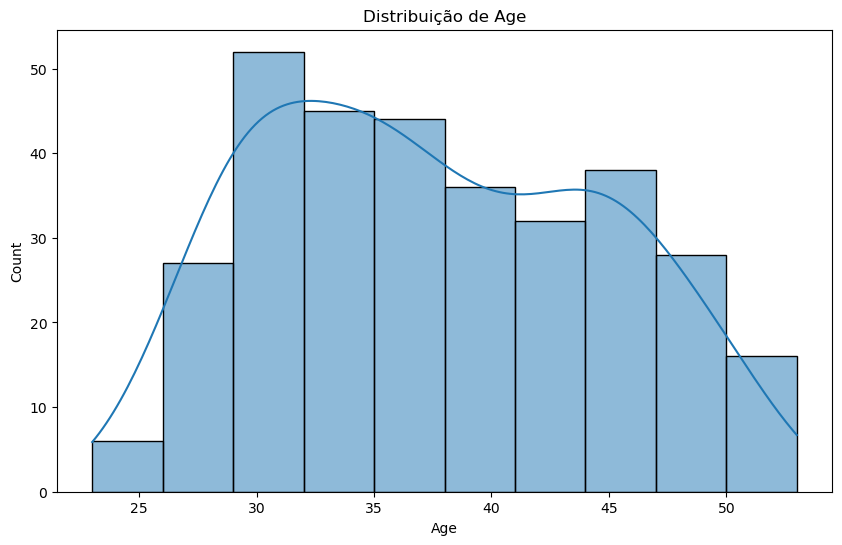

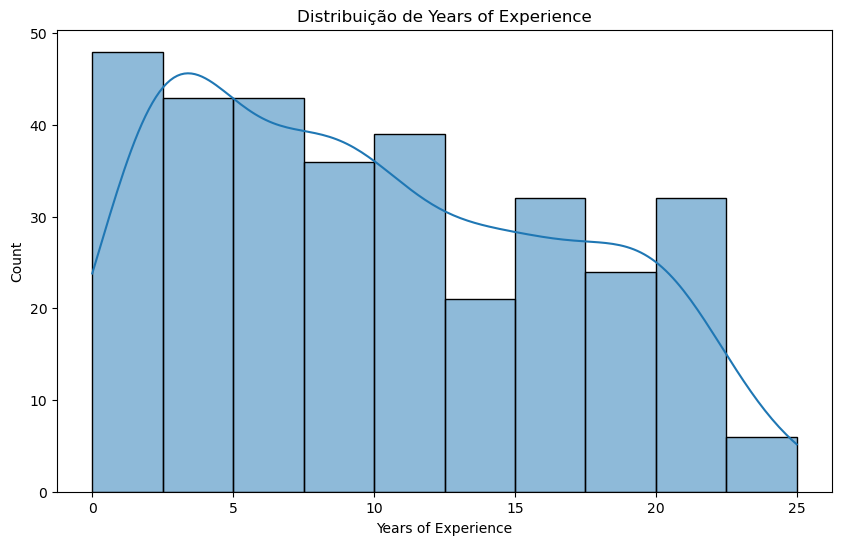

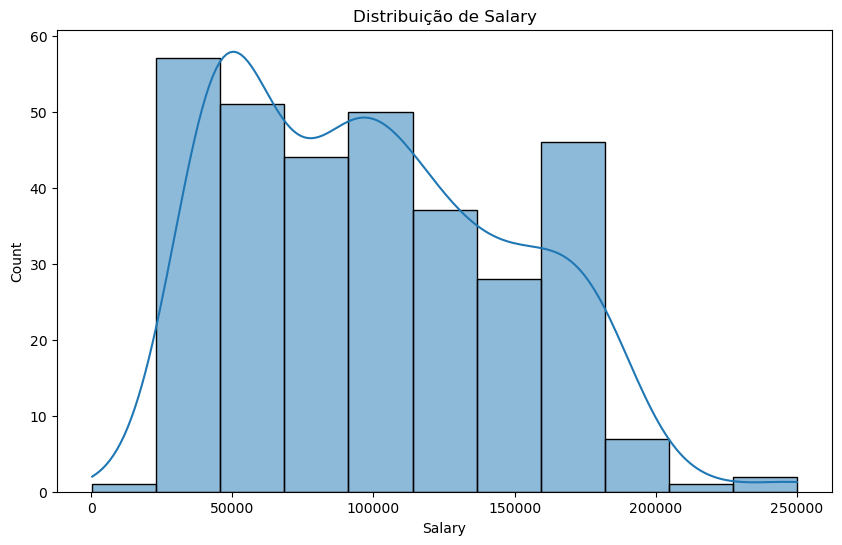

In [42]:
# Selecionando apenas as colunas numéricas
numeric_columns = df.select_dtypes(include=[np.number]).columns

for col in numeric_columns:
    # Criando o gráfico de densidade de kernel
    plt.figure(figsize=(10, 6))
    sns.histplot(data=df, x=col, kde=True)
    plt.title(f'Distribuição de {col}')
    plt.show()


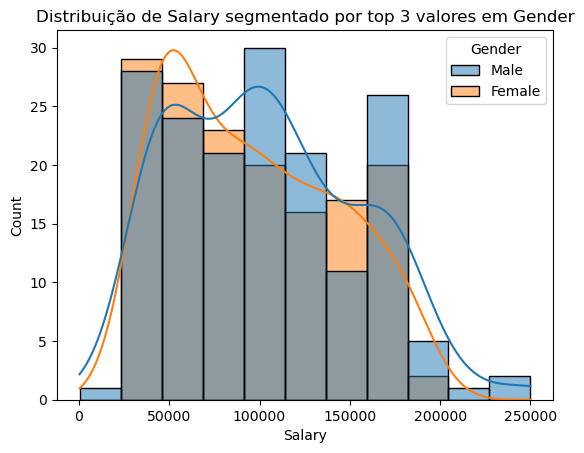

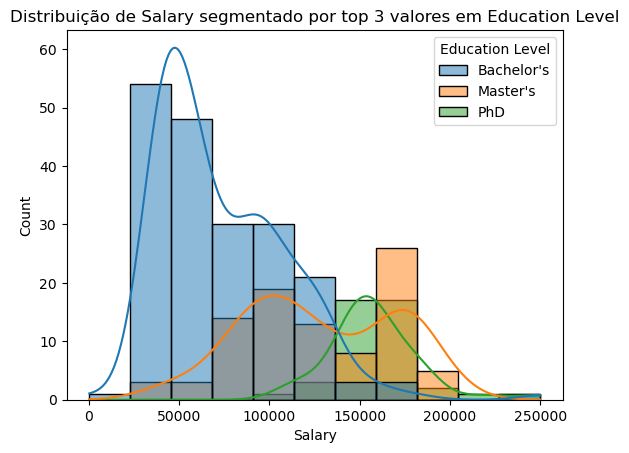

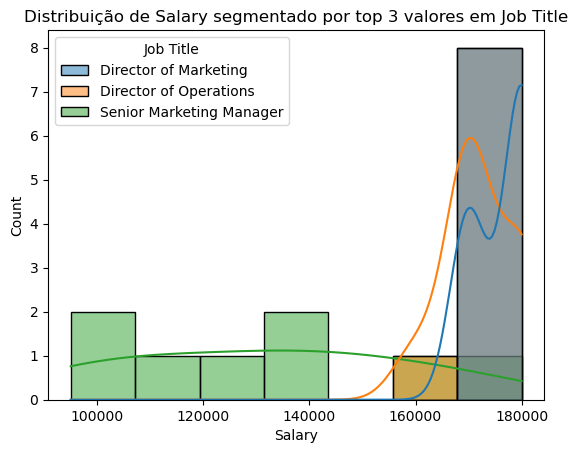

In [43]:
for col in text_columns:
    # Selecionando os top 3 valores
    top_3_values = df[col].value_counts().index[:3]

    # Filtrando o DataFrame original para incluir apenas as linhas que correspondem aos 3 principais valores
    df_top_3 = df[df[col].isin(top_3_values)]

    # Criando o gráfico de densidade de kernel
    sns.histplot(data=df_top_3, x="Salary", hue=col, kde=True)
    plt.title(f'Distribuição de Salary segmentado por top 3 valores em {col}')
    plt.show()




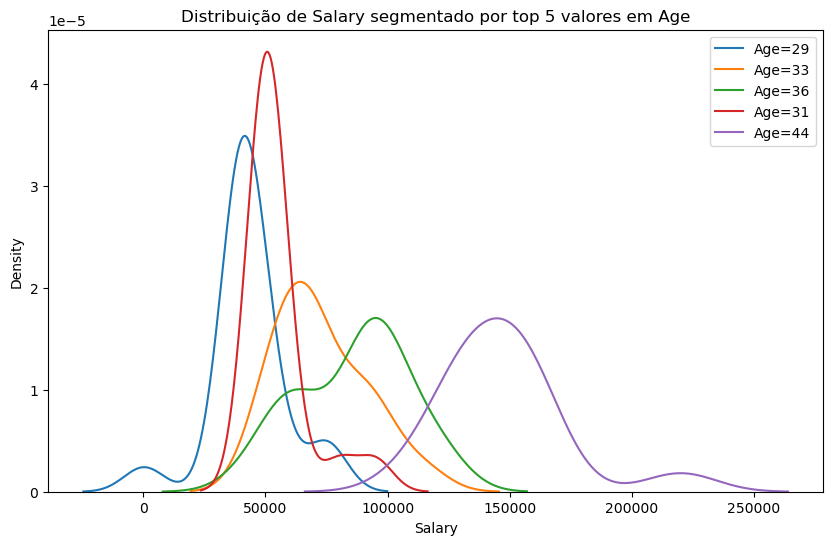

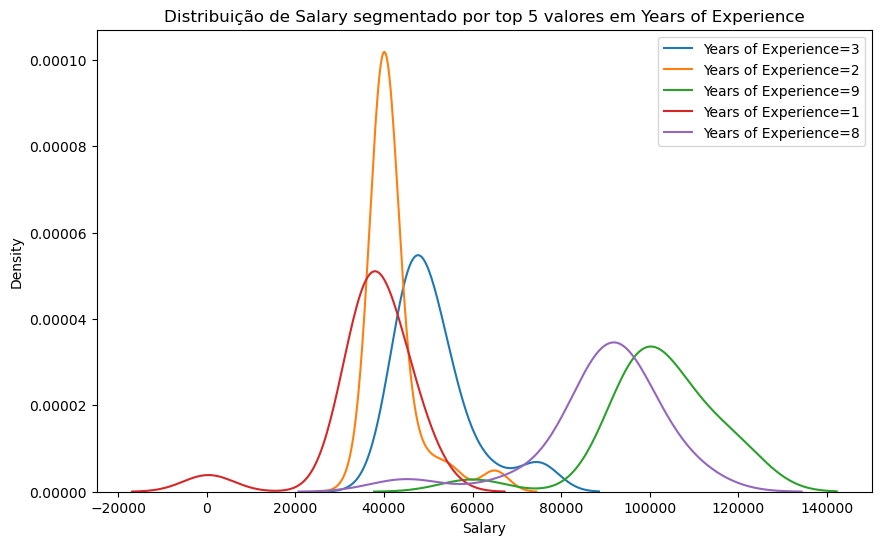

In [44]:
# Selecionando apenas as colunas numéricas, excluindo a coluna 'Salary'
numeric_columns_salary = df.select_dtypes(include=[np.number]).columns.drop('Salary')

for col in numeric_columns_salary:
    # Selecionando os top 5 valores
    top_5_values = df[col].value_counts().index[:5]

    # Criando um novo DataFrame com apenas os top 5 valores
    df_top_5 = df[df[col].isin(top_5_values)]

    # Criando o gráfico de densidade de kernel
    plt.figure(figsize=(10, 6))
    for value in top_5_values:
        sns.kdeplot(data=df_top_5[df_top_5[col] == value], x='Salary', label=f'{col}={value}')
    plt.title(f'Distribuição de Salary segmentado por top 5 valores em {col}')
    plt.legend()
    plt.show()



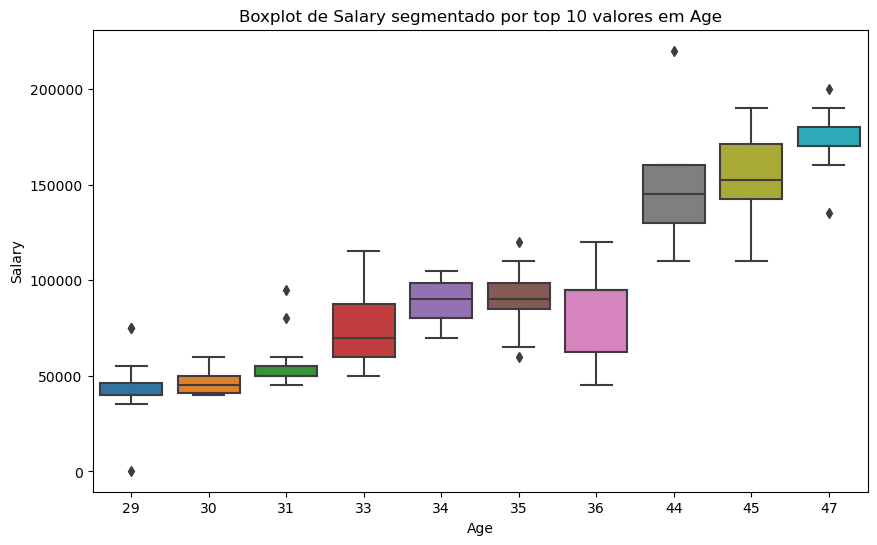

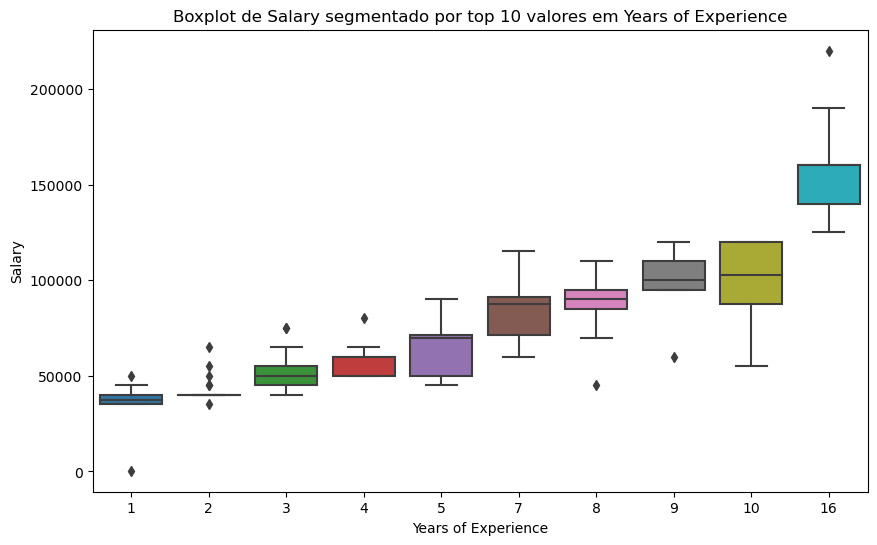

In [45]:
for col in numeric_columns_salary:
    # Selecionando os top 5 valores
    top_10_values = df[col].value_counts().index[:10]

    # Criando um novo DataFrame com apenas os top 5 valores
    df_top_10 = df[df[col].isin(top_10_values)]

    # Criando o boxplot
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=col, y='Salary', data=df_top_10)
    plt.title(f'Boxplot de Salary segmentado por top 10 valores em {col}')
    plt.show()



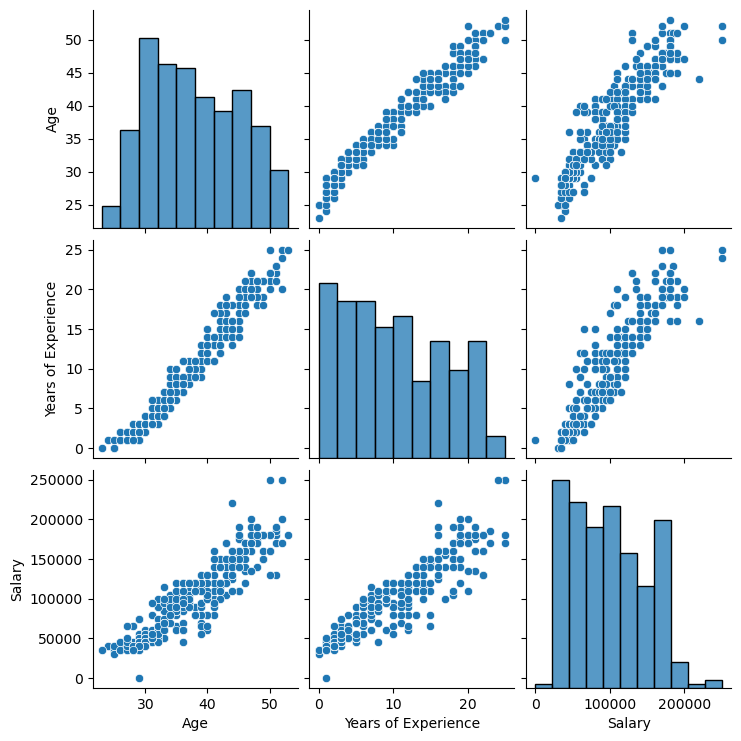

In [46]:
sns.pairplot(df);

In [50]:
df.reset_index(inplace=False)




,index,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,0,32,Male,Bachelor's,Software Engineer,5,90000
1,1,28,Female,Master's,Data Analyst,3,65000
2,2,45,Male,PhD,Senior Manager,15,150000
3,3,36,Female,Bachelor's,Sales Associate,7,60000
4,4,52,Male,Master's,Director,20,200000
...,...,...,...,...,...,...,...
319,348,28,Female,Bachelor's,Junior Operations Manager,1,35000
320,349,36,Male,Bachelor's,Senior Business Development Manager,8,110000
321,350,44,Female,PhD,Senior Data Scientist,16,160000
322,351,31,Male,Bachelor's,Junior Marketing Coordinator,3,55000


<AxesSubplot:>

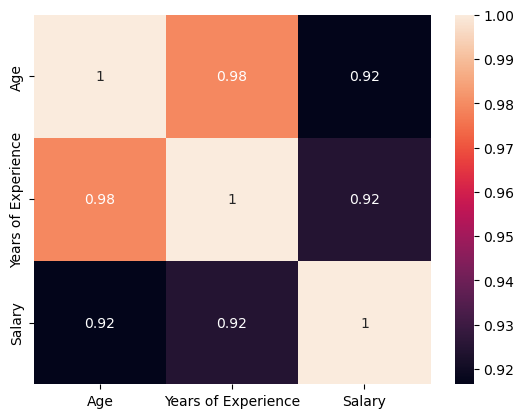

In [ ]:

sns.heatmap(df.corr(), annot=True)